### Gaussian Naive Classification

Uses Gaussian distribution as an assumption

In [1]:
#Step 1: Prepare your data

#1.1 Get your X and y in the right shape

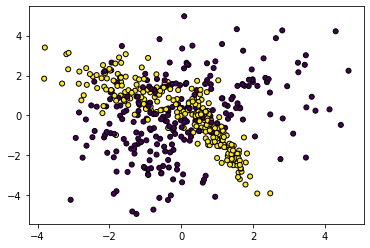

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X, y = make_classification(n_samples = 500, 
                           n_features = 10, 
                           n_redundant=2,
                          n_informative = 4)

plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
           s=25, edgecolor='k')

In [16]:
#1.2 Feature scale your data
#your code here
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [5]:
#1.3 Train test your data
X_train, X_test,y_train, y_test = \
    train_test_split(X, y, test_size=0.3)

In [19]:
#2. Calculate the mean and std for each feature for each class
# mean shape?
# std shape?
def mean_var(X_train, y_train):
    #your code here
    n = X_train.shape[1]
    #cell width cell height cell size
    #3 means
    #2 classes
    #(2, 3)
    mean = np.zeros((2, n))  #we have two classes, and n features
    std = np.zeros((2, n))
    for label in [0, 1]:
        mean[label, :] = X_train[y_train==label].mean(axis=0) #mean across samples, NOT features
        std[label, :] = X_train[y_train==label].std(axis=0) #mean across samples, NOT features
    return mean, std

mean, std = mean_var(X_train, y_train)
mean

array([[-0.05940655, -0.01839641, -0.03711388,  0.30456356,  0.99636102,
         0.02645512,  1.09376063, -0.0301165 ,  0.04516673,  1.37199899],
       [ 0.00481978, -0.04233358,  0.0026319 ,  0.07006756,  0.16957284,
         0.05387058,  0.07662213, -0.02264744,  0.02990452,  0.12494236]])

In [20]:
#3. Define a function that gonna calculate p(x | y)
#X shape?  Should this X be X_train, or X_test
def gaussian_pdf(X, mean, std):
    #your code here
    #use scipy.stats.normal.pdf()
    left = 1 / (np.sqrt(2 * np.pi) * std)
    e = (X - mean)**2 / (2 * (std**2))
    right = np.exp(-e)
    likelihood = left * right
    return likelihood

In [25]:
#4. Calculate the likelihood (p(x | y))
likelihood_0 = gaussian_pdf(X_test, mean[0, :], std[0, :])
likelihood_1 = gaussian_pdf(X_test, mean[1, :], std[1, :])

likelihood_0.shape #(m_test, n)
#please check what is the shape of likelihood_0?

(150, 10)

In [27]:
#5. Calculate total likelihood p(x | y) = \prod_{i=1}^{n} p(x_i | y)
total_likelihood_0 = np.prod(likelihood_0, axis=1) #do something with likelihood0
total_likelihood_1 = np.prod(likelihood_1, axis=1) #do something with likelihood1

#shape of total_likelihood0 #(m_test, )
total_likelihood_0.shape

(150,)

In [30]:
#6. Calculate p(y)
m = X_train.shape[0]
prior0 = len(X_train[y_train==0]) / m #something
prior1 = len(X_train[y_train==1]) / m #something

#shape of prior0
assert prior0 + prior1 == 1

In [14]:
#7. Calculate p(x | y=0) * p(y=0) ; p(x | y=1) * p(y=1)

In [31]:
#8. Whichever bigger one determines the class

In [37]:
##Multinomial Naive Classification
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
# data.target_names

In [38]:
categories = ['talk.religion.misc', 'soc.religion.christian',
             'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories = categories)
test = fetch_20newsgroups(subset='test', categories = categories)
# print(train.data[0][:300])  #first 300 words
# print("Target: ", train.target[0])

In [39]:
#make features based on count
#Note that you should use more advanced feature extraction 
#techniques in your research
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train.data)
X_test = vectorizer.transform(test.data) #<-----VERY important to do only transform.  Why?
X_test = X_test.toarray() #<----why i need to do this?
y_train = train.target
y_test = test.target

In [44]:
#calculating priors and likelihoods
def fit(X_train, y_train):
    m, n = X_train.shape
    classes = np.unique(y_train) #[0, 1, 2] or list of classes
    k = len(classes) #k is number of classes
    
    priors = np.zeros(1) #what is the shape of priors?
    likelihoods = np.zeros((1)) #what is the shape of likelihoods
    
    for ix, label in enumerate(classes):
        X_train_c = X_train[y_train==label]
        priors[ix] = prior(X_train_c, m)
        likelihoods[ix, :] = likelihood(X_train_c)
        
def prior(X_class, m):
    pass

def likelihood(X_class, laplace=1):
    pass

In [45]:
def predict(X_test, priors, likelihoods, classes):
    #calculate the posteriors
    #your code here
    pass

In [ ]:
#use all these functions to calculate and decide the class for X_test
#calculate the accuracy